<a href="https://colab.research.google.com/github/Savatage7/Yolo5_TT100K/blob/main/YOLOv4_tiny_Darknet_TT100K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
#take a look at the kind of GPU we have
!nvidia-smi

Wed Jun 15 10:42:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Installing Darknet for YOLOv4 on Colab




In [ ]:
%cd /content/
%rm -rf darknet

/content


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 1 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.05 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (10364/10364), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


**IMPORTANT! If you're not using a K80 GPU, then uncomment the sed command and replace the arch and code with that matching your GPU. A list can be found [here](http://arnon.dk/matching-sm-architectures-arch-and-gencode-for-various-nvidia-cards/).**

In [ ]:
#install environment from the Makefile
%cd darknet/
# compute_30, sm_30 for Tesla K80
# compute_75, sm_75 for Tesla T4
!sed -i 's/ARCH= -gencode arch=compute_75,code=sm_75/ARCH= -gencode arch=compute_30,code=sm_30/g' Makefile

#install environment from the Makefile
#note if you are on Colab Pro this works on a P100 GPU
#if you are on Colab free, you may need to change the Makefile for the K80 GPU
#this goes for any GPU, you need to change the Makefile to inform darknet which GPU you are running on.
!make

[Errno 2] No such file or directory: 'darknet/'
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [

## Clone a helper repo
It makes training the medical mask detecting model easy.
In order to train on your own data, this repo can be used as a blueprint. 
Changes to some files need to be made according to own data, but it is nothing complicated.

In [ ]:
#data download and structure building
!wget http://cg.cs.tsinghua.edu.cn/traffic-sign/data_model_code/data.zip
!unzip data.zip

!mkdir TT100K
!mkdir TT100K/data
!mkdir TT100K/data/train
!mkdir TT100K/data/test
!mkdir TT100K/data/val

!mkdir TT100K/data/train/images
!mkdir TT100K/data/test/images
!mkdir TT100K/data/val/images

!mkdir TT100K/data/train/labels
!mkdir TT100K/data/test/labels
!mkdir TT100K/data/val/labels

!mv data/train/* TT100K/data/train/images
!mv data/test/* TT100K/data/test/images
!mv /content/data/annotations.json TT100K/data

!mkdir "/content/yolov4"
!mkdir "/content/yolov4/train"
!mkdir "/content/yolov4/train/images"
!mkdir "/content/yolov4/test"
!mkdir "/content/yolov4/test/images"

#Save in drive if needed
# !cp -r "/content/TT100K" "/content/drive/MyDrive/"


In [ ]:
!cp -r "/content/TT100K/data/annotations.json" "/content/annotations.json"
!cp -r "/content/TT100K/data/train" "/content/yolov4"
!cp -r "/content/TT100K/data/test" "/content/yolov4"

In [ ]:
# download the pretrained Model for Yolo4 tiny
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [ ]:
# load if data stored in Drive


# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# !cp -r "/content/drive/MyDrive/TT100K/data/train" "/content/yolov4/"
# !cp -r "/content/drive/MyDrive/TT100K/data/test" "/content/yolov4/"
# !cp -r "/content/drive/MyDrive/TT100K/data/annotations.json" "/content/annotations.json"


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import json
import random
import shutil
import math

filedir = "/content/annotations.json"
annos = json.loads(open(filedir).read())
train_category_List=[]
for image in annos['imgs'].values():
  if 'train' in image['path']:
    for object in image['objects']:
      train_category_List.append(object['category'])
validation_pct=0.05
df = pd.DataFrame(dict(col1=np.array(train_category_List)))
c=df['col1'].value_counts()
d=pd.DataFrame({'class':c.index, 'count':c.values})
# top45Classess=d.head(45)['class'].values.tolist()

top45Classess_dict=d.head(45).set_index('class').T.to_dict('int')['count']
validationClasses_Dict={}
for k,v in top45Classess_dict.items():
  validationClasses_Dict[k]={}
  validationClasses_Dict[k]['imageIds']=[]

top45Classess=list(top45Classess_dict.keys())
print(top45Classess_dict)
print(top45Classess)

{'pn': 1886, 'pne': 1379, 'i5': 1045, 'p11': 969, 'pl40': 874, 'po': 735, 'pl50': 660, 'io': 580, 'pl80': 578, 'pl60': 526, 'p26': 515, 'i4': 476, 'pl100': 449, 'pl30': 373, 'il60': 338, 'i2': 297, 'pl5': 269, 'w57': 263, 'p5': 258, 'p10': 244, 'pl120': 208, 'il80': 197, 'ip': 190, 'p23': 163, 'pr40': 136, 'ph4.5': 122, 'w59': 122, 'p3': 111, 'w55': 109, 'pm20': 107, 'p12': 106, 'pg': 104, 'pl70': 103, 'pm55': 98, 'pl20': 98, 'il100': 92, 'w13': 90, 'p19': 87, 'p27': 84, 'ph4': 83, 'pm30': 75, 'wo': 73, 'ph5': 73, 'w32': 70, 'p6': 69}
['pn', 'pne', 'i5', 'p11', 'pl40', 'po', 'pl50', 'io', 'pl80', 'pl60', 'p26', 'i4', 'pl100', 'pl30', 'il60', 'i2', 'pl5', 'w57', 'p5', 'p10', 'pl120', 'il80', 'ip', 'p23', 'pr40', 'ph4.5', 'w59', 'p3', 'w55', 'pm20', 'p12', 'pg', 'pl70', 'pm55', 'pl20', 'il100', 'w13', 'p19', 'p27', 'ph4', 'pm30', 'wo', 'ph5', 'w32', 'p6']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.


In [ ]:
random.seed(33)
baseDir="/content/yolov4/"
def prepareObj(object):
  x_center=(object['bbox']['xmin']+object['bbox']['xmax'])/2
  y_center=(object['bbox']['ymin']+object['bbox']['ymax'])/2
  width=object['bbox']['xmax']-object['bbox']['xmin']
  height=object['bbox']['ymax']-object['bbox']['ymin']
  x_center/=2048
  y_center/=2048
  width/=2048
  height/=2048
  # return str(annos['types'].index(object['category']))+" "+str(x_center)+" "+str(y_center)+" "+str(width)+" "+str(height)+'\n'
  return str(top45Classess.index(object['category']))+" "+str(x_center)+" "+str(y_center)+" "+str(width)+" "+str(height)+'\n'

def addifTrain(cat,filePath):
  if "train/"in filePath:
    if filePath not in validationClasses_Dict[cat]["imageIds"]: 
      validationClasses_Dict[cat]["imageIds"].append(filePath) 
testLabels=[]
trainLabels=[]
validLabels=[]
# for image in annos['imgs'].values():
#   f=None
  # if 'train' in image['path']:
  #   f = open(baseDir+"train/images/"+str(image['id'])+".txt", "w")
  #   trainLabels.append(f.name.replace(".txt",".jpg"))


  # if 'test' in image['path']:
  #   f = open(baseDir+"test/images/"+str(image['id'])+".txt", "w")
  #   testLabels.append(f.name.replace(".txt",".jpg"))
  # if f:
  #   for object in image['objects']:
  #     if object['category'] in top45Classess:
  #       addifTrain(object['category'],f.name.replace(".txt",".jpg"))
  #       f.write(prepareObj(object))
  #   f.close()



# for k,v in validationClasses_Dict.items():
#   listtoMove=random.sample(validationClasses_Dict[k]['imageIds'], math.floor(validation_pct*len(list(validationClasses_Dict[k]['imageIds']))))
#   print(k,len(list(validationClasses_Dict[k]['imageIds'])),listtoMove)
#   for l in listtoMove:
#     if l not in validLabels:
#       print(l)
#       validLabels.append(l)
#       trainLabels.remove(l)

objdata="classes= 45","train  = /content/train.txt","valid  = /content/valid.txt","names = /content/obj.names","backup = backup/"

# with open("/content/train.txt", "w") as f:
#   f.write("\n".join( trainLabels ))
with open("/content/valid.txt", "w") as f:
  f.write("\n".join( testLabels ))
# with open("/content/valid.txt", "w") as f:
#   f.write("\n".join( validLabels ))
with open("/content/obj.names", "w") as f:
  f.write("\n".join( top45Classess ))
with open("/content/obj.data", "w") as f:
  f.write("\n".join( objdata ))

num_classes=len(top45Classess)

In [ ]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## Change the labels in obj.names to our current labels

## Change the number of classes in obj.data.
The paths are relative so no change there as long as the folder/file structure/names are not changed.

### Now that we see which parameters are of importance, let's modify them according to our dataset.

In [ ]:
import re
# set the number of max_batches - min 2000 per class:
max_batch=num_classes*227
# calculate the 2 steps values:
step1 = 0.8 * max_batch
step2 = 0.9 * max_batch

# we also need to adjust the number of classes and a parameter called filter size 
# that are both is inside the model structure

# num_classes = len(labels)
num_filters = (num_classes + 5) * 3


cfg_file = '/content/darknet/cfg/yolov4-tiny.cfg'

with open(cfg_file) as f:
    s = f.read()
# (re.sub('[a-z]*@', 'ABC@', s))
s = re.sub('max_batches = \d*','max_batches = '+str(max_batch),s)
s = re.sub('steps=\d*,\d*','steps='+"{:.0f}".format(step1)+','+"{:.0f}".format(step2),s)
s = re.sub('classes=\d*','classes='+str(num_classes),s)
s = re.sub('pad=1\nfilters=\d*','pad=1\nfilters='+"{:.0f}".format(num_filters),s)
# pad=1\nfilters=\d\d
# s = re.sub('CUDNN=0','CUDNN=1',s)
# s = re.sub('OPENCV=0','OPENCV=1',s)

with open('/content/darknet/cfg/yolov4-tiny_2.cfg', 'w') as f:
  # s = re.sub('GPU=0','GPU=1',s)
  f.write(s)


## Start the model training

In [ ]:
%cd ../darknet/
# !./darknet detector train /content/obj.data /content/darknet/cfg/yolov4-tiny_2.cfg /content/darknet/yolov4-tiny.conv.29 -dont_show -ext_output -map

/content/darknet


In [ ]:
!zip -r /content/backup.zip /content/darknet/backup
!zip -r /content/backup.zip /content/darknet/results
from google.colab import files
import os
import shutil
from datetime import datetime
newfile="/content/backup_"+str(datetime.now().timestamp())+".zip"
os.rename("/content/backup.zip",newfile)
shutil.copy(newfile,"/content/drive/MyDrive/TT100K")

  adding: content/darknet/backup/ (stored 0%)
  adding: content/darknet/backup/yolov4-tiny_2_best.weights (deflated 7%)
  adding: content/darknet/backup/yolov4-tiny_2_last.weights (deflated 7%)
  adding: content/darknet/backup/yolov4-tiny_2_10000.weights (deflated 7%)
  adding: content/darknet/backup/yolov4-tiny_2_final.weights (deflated 7%)
  adding: content/darknet/results/ (stored 0%)
  adding: content/darknet/results/tmp.txt (stored 0%)


'/content/drive/MyDrive/TT100K/backup_1655190797.977073.zip'

## Check the model performance
The metrics run on the test images so they may not be fully representative, only indicative

In [ ]:
!./darknet detector map /content/obj.data /content/darknet/cfg/yolov4-tiny_2.cfg "/content/yolov4-tiny_2_final.weights" -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    640 x 640 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x  64 1.887 BF
   3 route  2 		                       1/2 ->  160 x 160 x  32 
   4 conv     32       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  32 0.472 BF
   5 conv     32       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  32 0.472 BF
   6 route  5 4 	                           ->  160 x 160 x  64 
   7 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   8 route  2 7 	     

## Run detection on an image. I choose one of the test images from test.txt

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    640 x 640 x   3 ->  320 x 320 x  32 0.177 BF
   1 conv     64       3 x 3/ 2    320 x 320 x  32 ->  160 x 160 x  64 0.944 BF
   2 conv     64       3 x 3/ 1    160 x 160 x  64 ->  160 x 160 x  64 1.887 BF
   3 route  2 		                       1/2 ->  160 x 160 x  32 
   4 conv     32       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  32 0.472 BF
   5 conv     32       3 x 3/ 1    160 x 160 x  32 ->  160 x 160 x  32 0.472 BF
   6 route  5 4 	                           ->  160 x 160 x  64 
   7 conv     64       1 x 1/ 1    160 x 160 x  64 ->  160 x 160 x  64 0.210 BF
   8 route

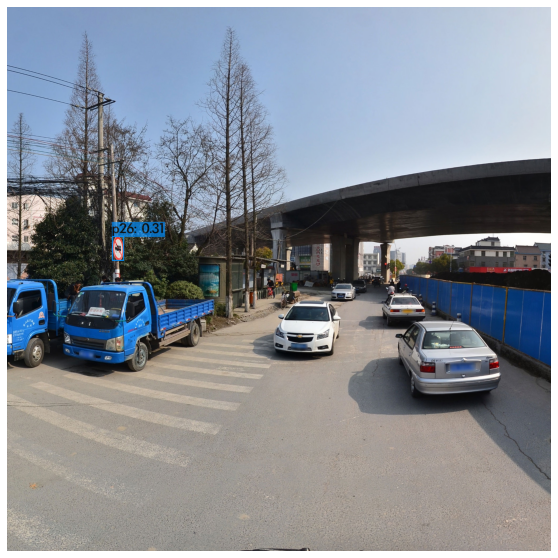

In [ ]:
!./darknet detector test /content/obj.data /content/darknet/cfg/yolov4-tiny_2.cfg "/content/yolov4-tiny_2_final.weights" /content/69096.jpg -ext_output
imShow('predictions.jpg')